In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn import model_selection
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.preprocessing import PolynomialFeatures
from scipy.interpolate import LSQUnivariateSpline
import statsmodels.api as sm
from statsmodels.gam.api import GLMGam, BSplines

### Q1

#### A

In [2]:
hitters = pd.read_csv('MyHitters.csv')

In [3]:
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,475,123,27,76,93,72,4,1810,471,108,292,343,267,1,0,226,10,6,1220.000,1
1,584,158,15,70,84,42,5,2358,636,58,265,316,134,1,0,331,20,4,662.500,1
2,484,127,20,66,65,67,7,3006,844,116,436,458,377,1,0,1231,80,7,1183.333,1
3,642,211,14,107,59,52,5,2364,770,27,352,230,193,1,1,337,19,4,740.000,1
4,311,81,3,42,30,26,17,8247,2198,100,950,909,690,1,1,153,223,10,320.000,1


In [4]:
y = hitters['Salary']
X = hitters.drop(columns=['Salary'])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=132)

In [27]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = regr.predict(X_test)
mse_value = mean_squared_error(y_test,y_pred)

In [29]:
print(mse_value)

122731.08941364333


#### B

In [37]:
pca = PCA()
X_reduced_columns = pca.fit_transform(X)

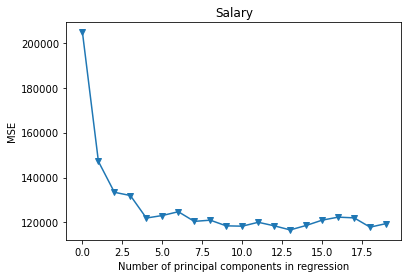

In [36]:
X_columns_len = len(X_reduced_columns)
kf = model_selection.KFold( n_splits=5, shuffle=True, random_state=1)

regr = linear_model.LinearRegression()
mse = []

score = -1*model_selection.cross_val_score(regr, np.ones((X_columns_len,1)), y.ravel(), cv=kf, scoring='neg_mean_squared_error').mean()    
mse.append(score)

for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced_columns[:,:i], y.ravel(), cv=kf, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

#### C

In [39]:
X = scale(X)

In [40]:
u, s, vh = np.linalg.svd(X, full_matrices=True)

In [41]:
u.shape, s.shape, vh.shape

((263, 263), (19,), (19, 19))

In [42]:
C = vh * s

### Q2

#### A

In [47]:
auto = pd.read_csv('auto.csv')

In [65]:
X = np.array(auto['mpg'].values).reshape((-1,1))
y = np.array(auto['horsepower'].values).reshape((-1,1))

In [66]:
poly_regr = PolynomialFeatures(degree = 6)
X_poly_regr = poly_regr.fit_transform(X)

lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_poly_regr,y)

LinearRegression()

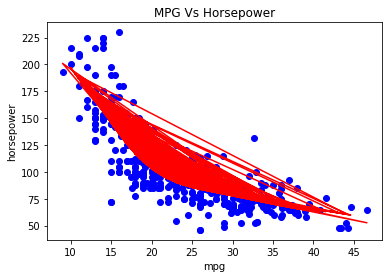

In [67]:
# Visualising the Linear Regression 
plt.title("MPG Vs Horsepower")
plt.xlabel('mpg')
plt.ylabel('horsepower')
plt.scatter(X, y, color = "blue")
plt.plot(X,lin_reg.predict(X_poly_regr),color = "red")
plt.show()

#### B

In [78]:
auto=auto[['horsepower','mpg']].sort_values('horsepower')
X=np.array(auto['horsepower'])
y=np.array(auto['mpg'])

In [85]:
knots=[55,75,105,155]

spline = LSQUnivariateSpline(X,y,knots)

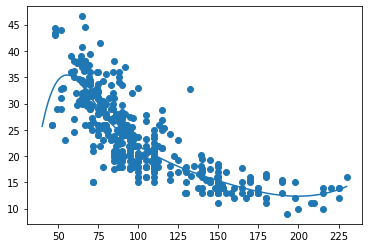

In [86]:
#Plot the spline
xs = np.linspace(40,230,1000)
ys = spline(xs)
plt.scatter(X, y)
plt.plot(xs, ys)
plt.savefig('fig2.png', bbox_inches='tight')

#### C

In [87]:
auto = pd.read_csv('auto.csv')

In [88]:
X = auto[['horsepower','acceleration','year']]
y = auto['mpg']

In [93]:
X_train = X.loc[:349]
y_train = y.loc[:349]
X_test = X.loc[350:]
y_test = y.loc[350:]

In [94]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [95]:
y_pred = regr.predict(X_test)
mse_value = mean_squared_error(y_test,y_pred)
print(mse_value)

12.059045079717883


In [98]:
bs = BSplines(X, df=[10, 10,10], degree=[6, 6,6])

In [101]:
gam_bs = GLMGam.from_formula('mpg ~ horsepower + acceleration + year',data=auto,smoother=bs)

In [106]:
res_bs = gam_bs.fit()
res_bs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    mpg   No. Observations:                  392
Model:                         GLMGam   Df Residuals:                   364.00
Model Family:                Gaussian   Df Model:                        27.00
Link Function:               identity   Scale:                          9.6313
Method:                         PIRLS   Log-Likelihood:                -985.64
Date:                Thu, 25 Mar 2021   Deviance:                       3505.8
Time:                        11:06:41   Pearson chi2:                 3.51e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.5848      0.799      3.236      0.001       1.019       4.150
horsepower         -0.1704      0.016    -10.412      0.000      -0.202      -0.138
acceleration       -0.4113      0.244     -1.685      0.092      -0.890       0.067
year                0.6671      0.074      9.023      0.000       0.522       0.812
horsepower_s0       2.4073      4.626      0.520      0.603      -6.659      11.474
horsepower_s1       0.6847      2.941      0.233      0.816      -5.080       6.449
horsepower_s2      -3.2585      3.688     -0.884      0.377     -10.486       3.969
horsepower_s3      -9.5168      6.344     -1.500      0.134     -21.951       2.917
horsepower_s4      -0.4597     10.172     -0.045      0.964     -20.395      19.476
horsepower_s5     -13.9281     10.400     -1.339      0.180     -34.311       6.455
horsepower_s6       9.9131      9.419      1.052      0.293      -8.548      28.374
horsepower_s7      -4.4733      6.296     -0.711      0.477     -16.812       7.866
horsepower_s8       8.0944      2.561      3.160      0.002       3.074      13.114
acceleration_s0     3.6586      8.213      0.445      0.656     -12.439      19.756
acceleration_s1     2.3324      6.042      0.386      0.699      -9.510      14.175
acceleration_s2     0.4940      5.854      0.084      0.933     -10.979      11.967
acceleration_s3     5.6206      6.980      0.805      0.421      -8.059      19.300
acceleration_s4    -6.5430      8.176     -0.800      0.424     -22.568       9.482
acceleration_s5     5.5873      6.852      0.815      0.415      -7.843      19.017
acceleration_s6    -9.6958      9.140     -1.061      0.289     -27.610       8.218
acceleration_s7     1.9720      7.742      0.255      0.799     -13.203      17.147
acceleration_s8     1.7706      2.648      0.669      0.504      -3.420       6.961
year_s0             1.0014      3.358      0.298      0.766      -5.581       7.584
year_s1            -6.1793      5.141     -1.202      0.229     -16.256       3.897
year_s2             4.8637      7.118      0.683      0.494      -9.088      18.815
year_s3           -20.8747     10.200     -2.047      0.041     -40.866      -0.883
year_s4            16.7525     10.338      1.621      0.105      -3.509      37.014
year_s5           -21.5558      7.309     -2.949      0.003     -35.882      -7.229
year_s6            17.9042      5.293      3.383      0.001       7.530      28.278
year_s7           -15.3296      3.326     -4.609      0.000     -21.848      -8.811
year_s8            -1.3905      1.185     -1.174      0.241      -3.713       0.932
===================================================================================
"""

In [112]:
y_pred = gam_bs.predict(res_bs.params)
mse_value = mean_squared_error(y,y_pred)
print(mse_value)

8.943354760279044
